# Exploratory Data Analysis & Machine Learning Working Code
# _Factors affecting vessel delays at US Army Corps of Engineers-managed locks on US waterways._

## Springboard Data Science Career Track, Capstone 2
***
* Author: Heather A. Passmore
* Data: United States Army Corps of Engineers, Lock Performance Management System
* Capstone Description: [Project Proposal](https://github.com/PassMoreHeat/springboard/blob/master/Capstone_2/ProjectProposalCap2.md)
* Initial Data Approach: [Data Wrangling Report](https://github.com/PassMoreHeat/springboard/blob/master/Capstone_2/Data_Wrangling_Report.md)
* Milestone Report: [Predicting Vessel Delays for Corps of Engineers-Lock Performance Management System (LPMS) Data](https://github.com/PassMoreHeat/springboard/blob/master/Capstone_2/LPMS_Milestone_Report.md)
* Final Report: In Progress
***
## Table of Contents
1. Import Modules & Dataframes
2. Explore Machine Learning Data for 10 Focal Locks

3. Heading 
4. Heading

## 1. Import Modules & Dataframes

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import pickle
import scipy.stats
from scipy.stats import norm
import scipy as sp

# Figures inline, visualization style
%matplotlib inline

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

In [2]:
# Import scikit-learn tools, vectorizers, transformer, and classifiers
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# import Logistic Regression CV Classifier
from sklearn.linear_model import LogisticRegressionCV


In [3]:
# Bring ML_LPMS_final dataframe into workspace
# load the pickled ML_LPMS_final DataFrame from hard drive in 'rb' mode
with open('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/ML_LPMS_final.pickle','rb') as f:
    ML = pickle.load(f)

## 2. Explore Machine Learning Data for 10 Focal Locks

In [5]:
# Explore data for 10 focal locks
ML.E_R_L.value_counts()

B2_GI_77    1770
B2_FB_41    1763
M3_GI_11    1726
M3_GI_12    1710
B3_MI_27    1660
H2_OH_76    1641
B2_GI_4     1614
M3_GI_14    1571
G3_WS_1     1248
B2_GI_3      835
Name: E_R_L, dtype: int64

In [8]:
ML.LOCKAGE_TYPE.value_counts()

S    9349
O    6070
C      53
K      47
N       9
B       5
V       3
A       1
T       1
Name: LOCKAGE_TYPE, dtype: int64

In [12]:
# Log transform 'delay_time' to constrain spread
ML = ML.assign(log_delay = lambda x: np.log(x.delay_time + 0.1))

In [22]:
# Log transform 'unplan_max_stop' to constrain spread
ML = ML.assign(log_unplan = lambda x: np.log(x.unplan_max_stop + 0.1))

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


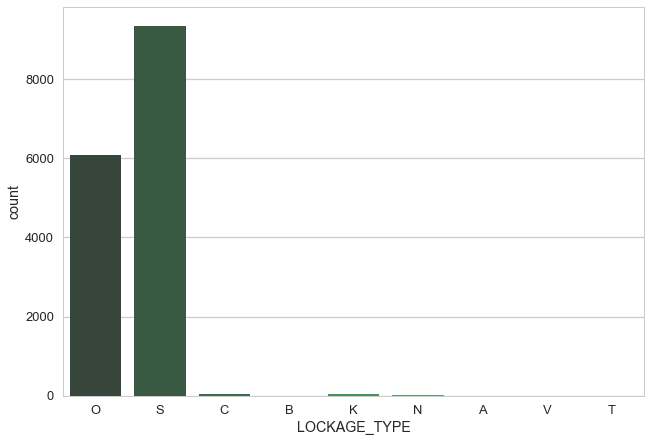

In [9]:
# Plot 'delay_cat' by 'LOCKAGE_TYPE' with Seaborn countplot
sns.countplot(x='LOCKAGE_TYPE', data=ML, palette="Greens_d");
# need to lump lockage types C, B, K, N, A, V, T into 'other' category

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


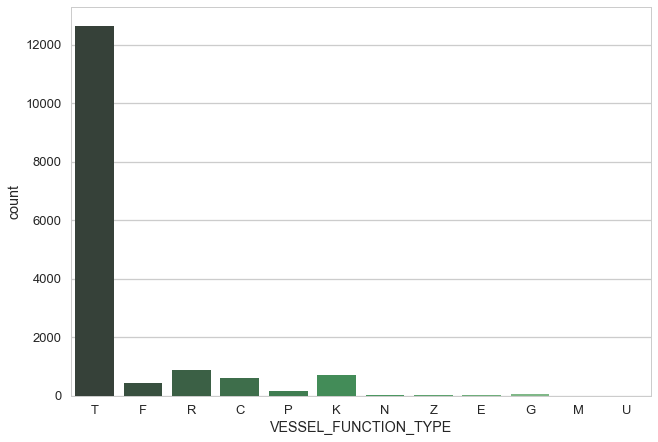

In [10]:
# Plot 'delay_cat' by 'LOCKAGE_TYPE' with Seaborn countplot
sns.countplot(x='VESSEL_FUNCTION_TYPE', data=ML, palette="Greens_d");

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


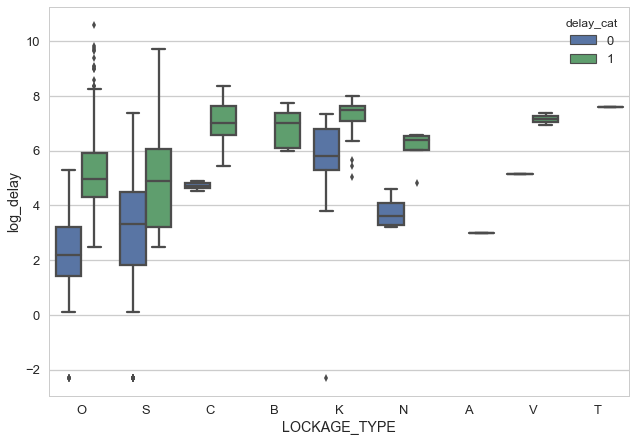

In [14]:
# Use boxplot to see delay_time with delay_cat and LOCKAGE_TYPE
sns.boxplot(x="LOCKAGE_TYPE", y="log_delay", hue="delay_cat", data=ML);

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


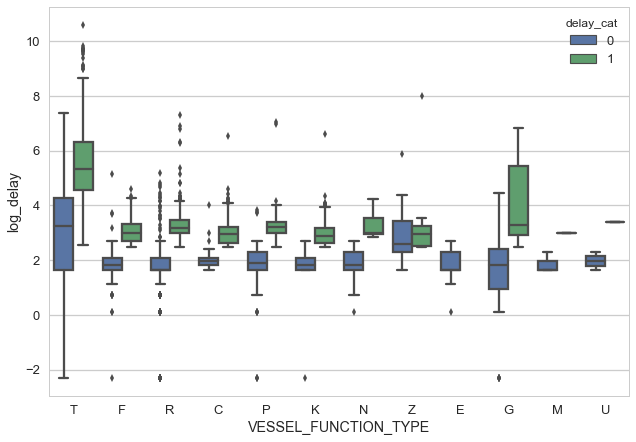

In [13]:
# Use boxplot to see delay_time with delay_cat and VESSEL_FUNCTION_TYPE
sns.boxplot(x="VESSEL_FUNCTION_TYPE", y="log_delay", hue="delay_cat", data=ML);

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


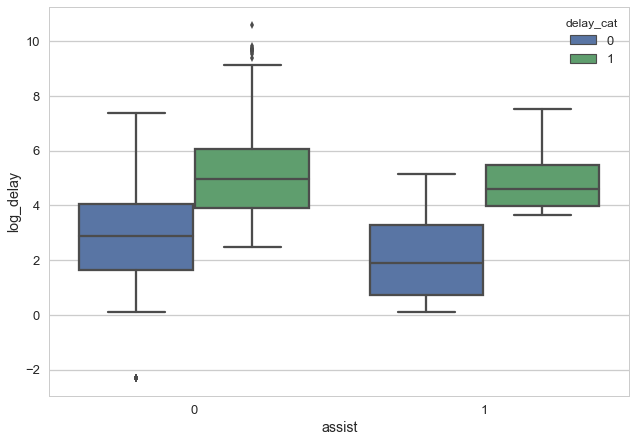

In [15]:
# Use boxplot to see delay_time with delay_cat
sns.boxplot(x="assist", y="log_delay", hue="delay_cat", data=ML);

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


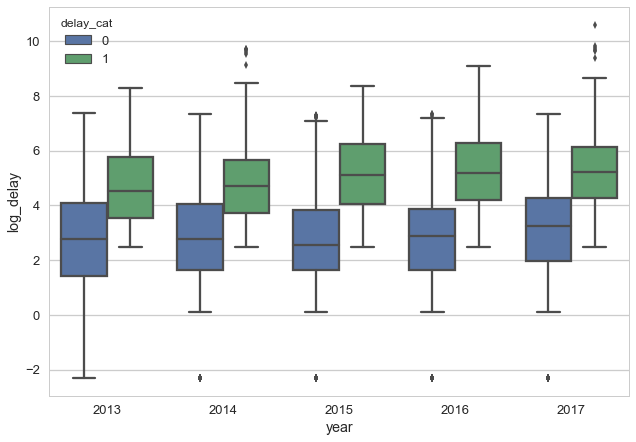

In [16]:
# Use boxplot to see delay_time with delay_cat
sns.boxplot(x="year", y="log_delay", hue="delay_cat", data=ML);

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


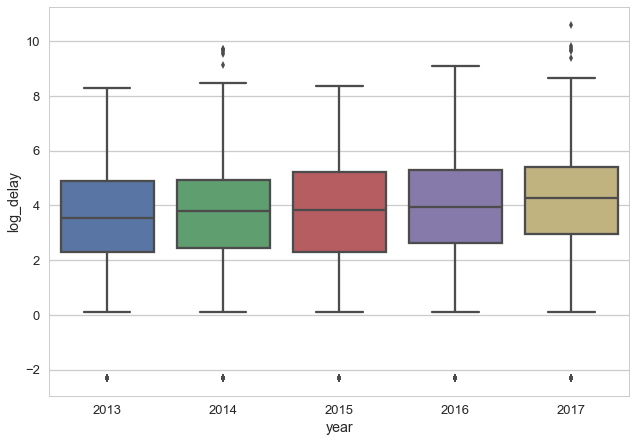

In [17]:
# Use boxplot to see delay_time with delay_cat
sns.boxplot(x="year", y="log_delay",  data=ML);

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


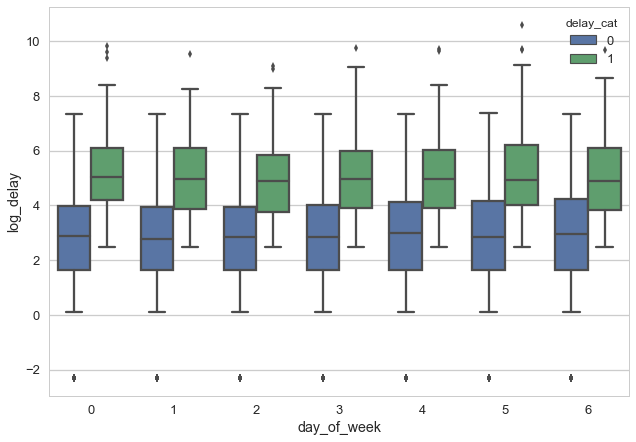

In [19]:
# Use boxplot to see delay_time with delay_cat
sns.boxplot(x="day_of_week", y="log_delay", hue="delay_cat", data=ML);

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


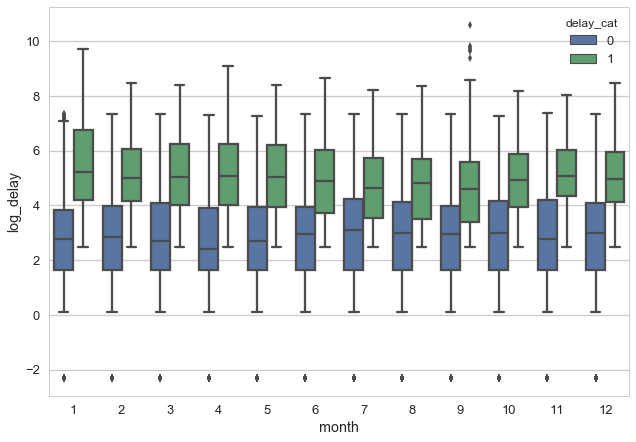

In [20]:
# Use boxplot to see delay_time with delay_cat
sns.boxplot(x="month", y="log_delay", hue="delay_cat", data=ML);

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


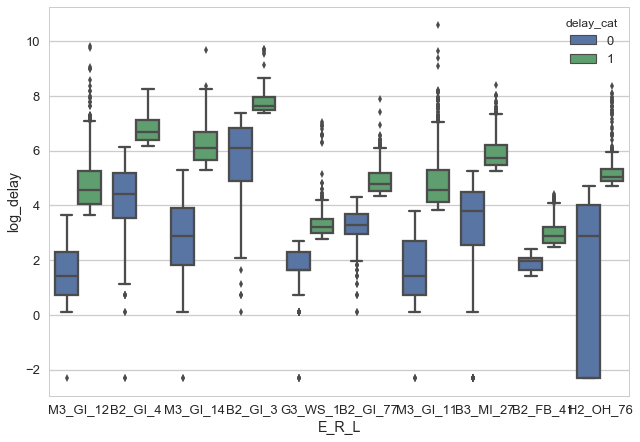

In [28]:
# Use boxplot to see delay_time with delay_cat
sns.boxplot(x="E_R_L", y="log_delay", hue="delay_cat", data=ML);

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


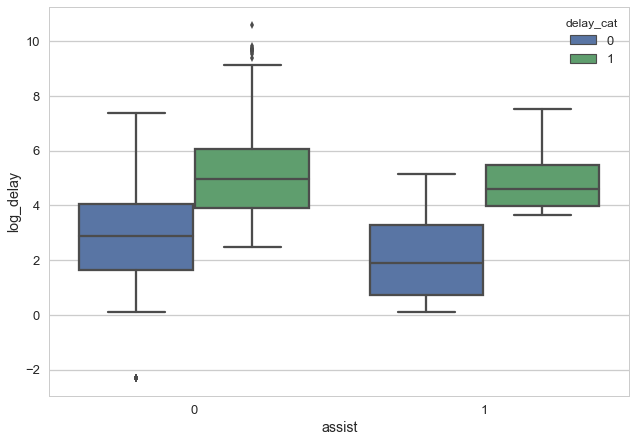

In [29]:
# Use boxplot to see log_delay with delay_cat for assist where 1= True, 0= False (no assist)
sns.boxplot(x="assist", y="log_delay", hue="delay_cat", data=ML);

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


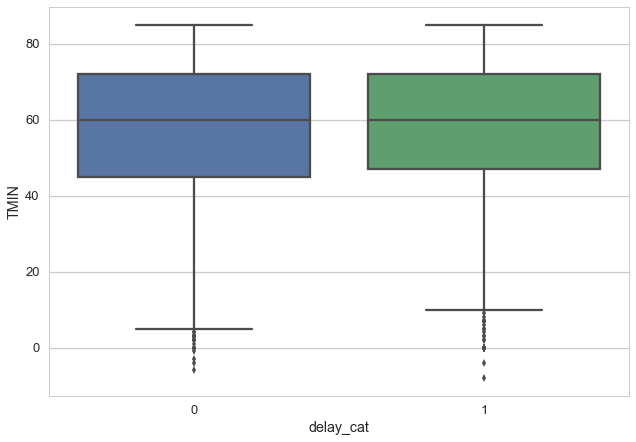

In [35]:
# Use boxplot to see log_delay with delay_cat for assist where 1= True, 0= False (no assist)
sns.boxplot(x="delay_cat", y="TMIN",  data=ML);

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


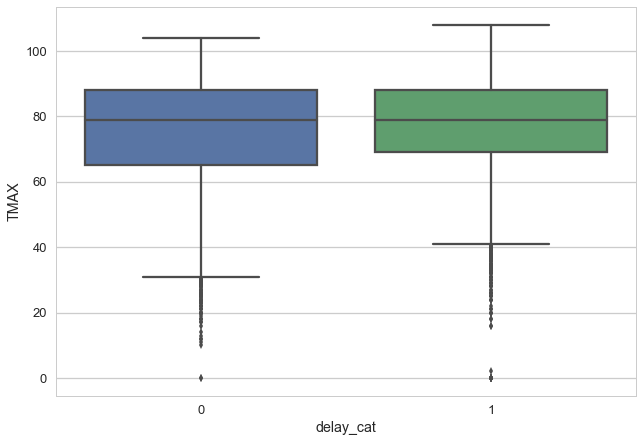

In [36]:
# Use boxplot to see log_delay with delay_cat for assist where 1= True, 0= False (no assist)
sns.boxplot(x="delay_cat", y="TMAX",  data=ML);

/Users/pgagnon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


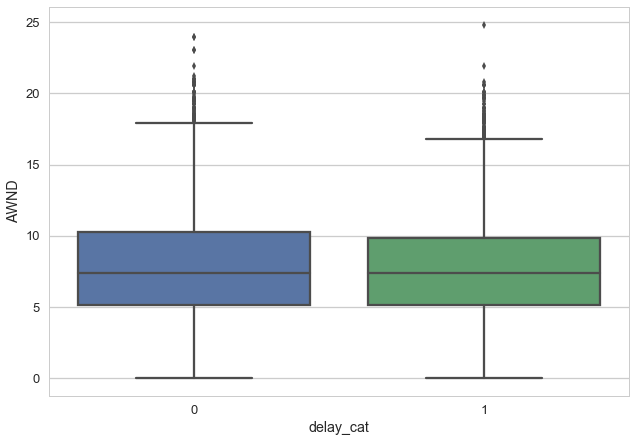

In [38]:
# Use boxplot to see log_delay with delay_cat for assist where 1= True, 0= False (no assist)
sns.boxplot(x="delay_cat", y="AWND",  data=ML);

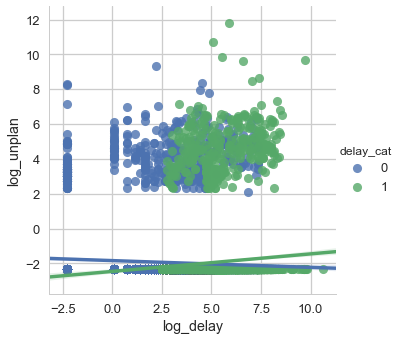

In [23]:
# scatter with log_delay and unplan_max_stop
sns.lmplot(x="log_delay", y="log_unplan", hue="delay_cat", data=ML)

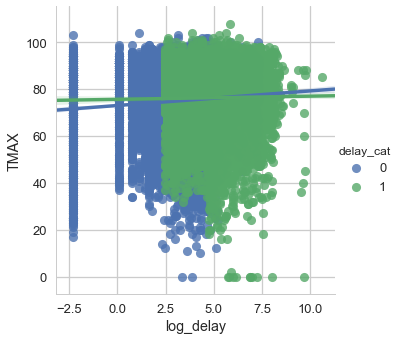

In [24]:
# scatter with log_delay and unplan_max_stop
sns.lmplot(x="log_delay", y="TMAX", hue="delay_cat", data=ML)

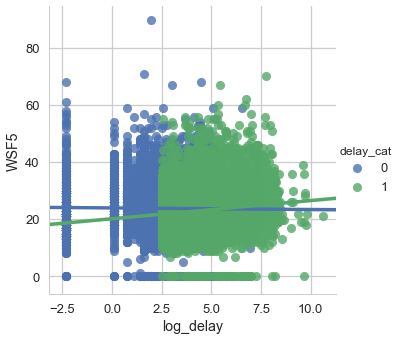

In [25]:
# scatter with log_delay and unplan_max_stop
sns.lmplot(x="log_delay", y="WSF5", hue="delay_cat", data=ML)

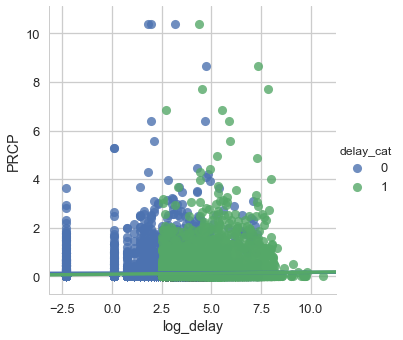

In [26]:
# scatter with log_delay and unplan_max_stop
sns.lmplot(x="log_delay", y="PRCP", hue="delay_cat", data=ML)

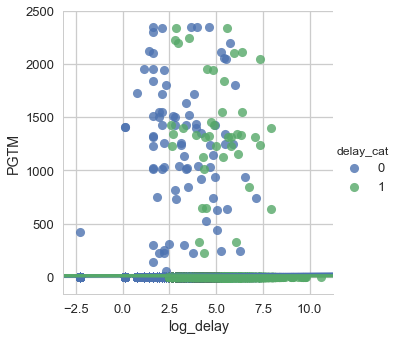

In [27]:
# scatter with log_delay and unplan_max_stop
sns.lmplot(x="log_delay", y="PGTM", hue="delay_cat", data=ML)

In [31]:
# create arrays for t-test of min_temp and delay_cat
temp_delay = ML.TMIN[ML.delay_cat == 1]
temp_not = ML.TMIN[ML.delay_cat == 0]

In [32]:
temp_delay.describe()

count    7103.000000
mean       58.422216
std        15.266001
min        -8.000000
25%        47.000000
50%        60.000000
75%        72.000000
max        85.000000
Name: TMIN, dtype: float64

In [33]:
temp_not.describe()

count    8435.000000
mean       57.258091
std        16.716906
min        -6.000000
25%        45.000000
50%        60.000000
75%        72.000000
max        85.000000
Name: TMIN, dtype: float64

In [34]:
# perform hypothesis test with two-sided independent t-test for equal variances
tstat, p_value = scipy.stats.ttest_ind(temp_not, temp_delay, equal_var=True)
print('Tests statistic', '{0:0.3f}'.format(tstat))
print('P-value of test', '{0:0.3f}'.format(p_value))
if p_value < 0.05:
    print('Reject the Null hypothesis: There is a difference between minimum daily temperature for delay vs not delayed.')
else:
    print('Fail to reject the Null: There is no difference between minimum daily temperature for delay categories.')

Tests statistic -4.498
P-value of test 0.000
Reject the Null hypothesis: There is a difference between minimum daily temperature for delay vs not delayed.


## 3. Convert all categorical variables remaining to numerical with encoding

In [ ]:
# Make a list of categorical columns that need to be encoded
catvar = []

In [ ]:
# Use label encoder for categorical variables
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
tmp = ML[catvar].apply(lbl_enc.fit_transform)

In [ ]:
ML.drop(catvar, axis=1, inplace=True)
ML_LPMS = pd.concat([ML, tmp], axis=1)

In [ ]:
ML_LPMS.shape

In [ ]:
colnames = list(ML_LMPS.columns[1:])

## 4. Create feature matrix and target vector then split into testing and training

In [ ]:
X = ML_LPMS.drop(['delay_cat'], axis=1).values
y = df.delay_cat.values

In [ ]:
X.shape

In [ ]:
# Train Test Split
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Show the results of the split
print("X Training set sample size:", (X_train.shape[0]))
print("X Testing set sample size:", (X_test.shape[0]))
print("y Training set sample size:", (y_train.shape[0]))
print("y Testing set sample size:", (y_test.shape[0]))